# Author:- Jai Ganesh

## Task :- Exploratory Data Analysis - Retail

### Objective:
* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

* As a business manager, try to find out the weak areas where you can work to make more profit.

* What all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,8]

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking Missing Values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Checking for duplicates

In [7]:
df.duplicated().sum()

17

There are total 17 duplicate values that we need to drop

In [8]:
df.drop_duplicates(inplace=True)

##### Deleting irrelevant Variables

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.drop('Postal Code',axis=1,inplace=True)

### Univariate Analysis

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

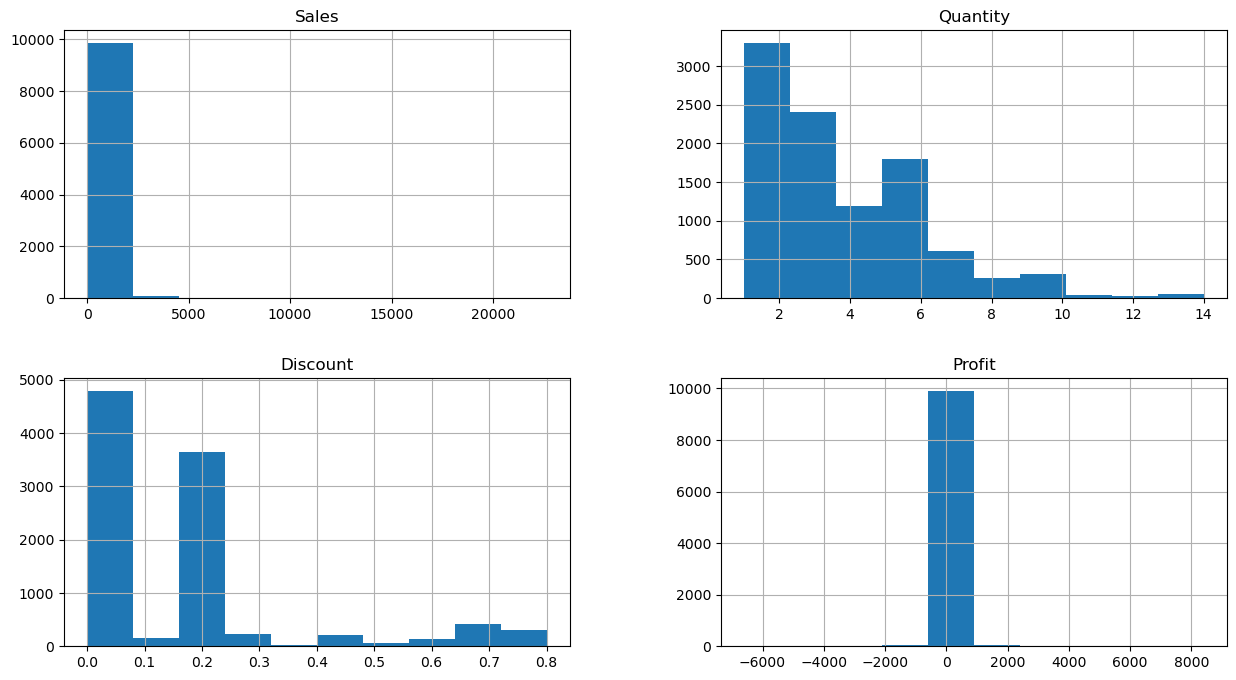

In [11]:
df.hist()

As we can see above the data is not normally distributed

<AxesSubplot:>

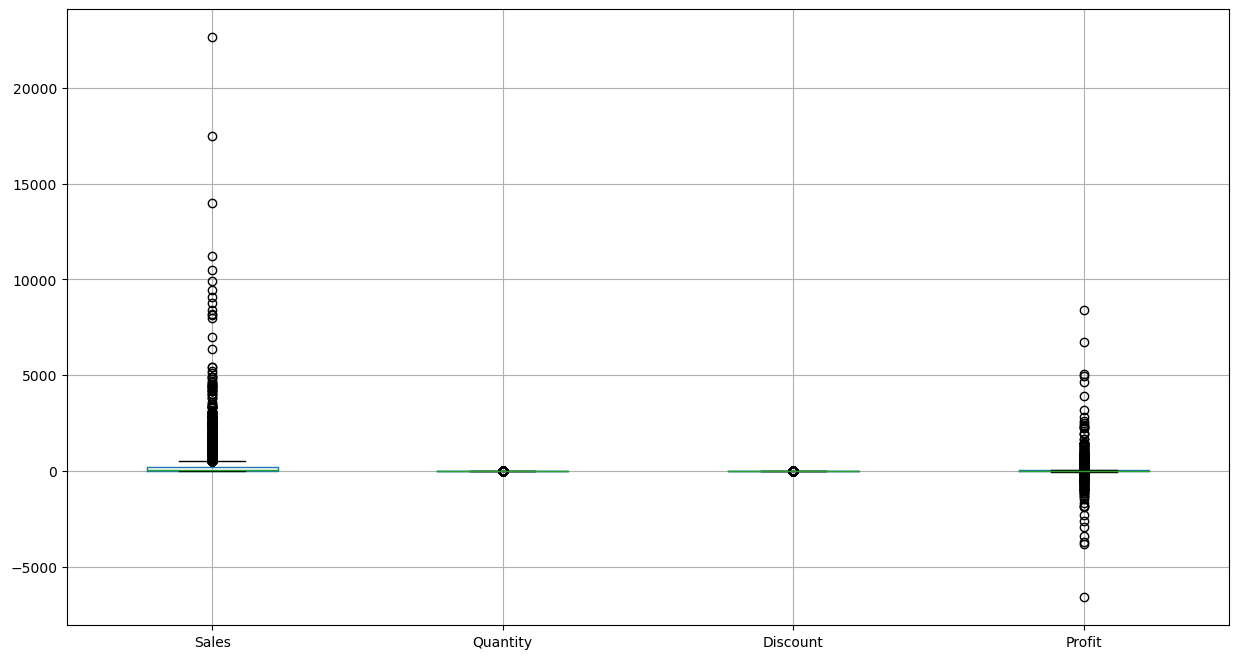

In [12]:
df.boxplot()

There are ouliers present in the data but we don't need to treat them because variables include sales,profit if we treat them the importance of the data will be lose.

In [13]:
# Correaltion
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [14]:
# Covariance
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


In [15]:
# Kurtorsis
df.kurt()

Sales       304.870940
Quantity      1.983746
Discount      2.406089
Profit      396.515988
dtype: float64

## Exploratory Data Analysis

In [16]:
for i in df.select_dtypes(include='O'):
    print(i)
    print('---------------------------------------------------------------')
    print(df[i].value_counts())
    print('*************************************************************')
    

Ship Mode
---------------------------------------------------------------
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64
*************************************************************
Segment
---------------------------------------------------------------
Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64
*************************************************************
Country
---------------------------------------------------------------
United States    9977
Name: Country, dtype: int64
*************************************************************
City
---------------------------------------------------------------
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Le

<AxesSubplot:>

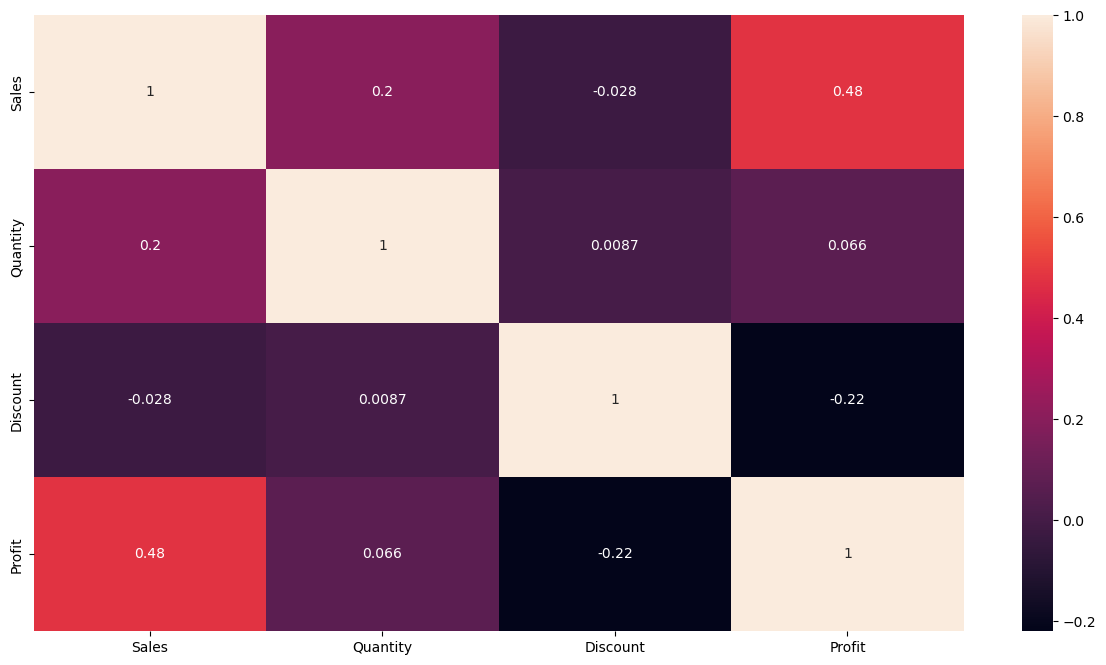

In [17]:
# check correlation
sns.heatmap(df.corr(),annot=True, linecolor='w')

we notice there's correlation between (profit, discount) and (profit, sales) and (quantity, sales)



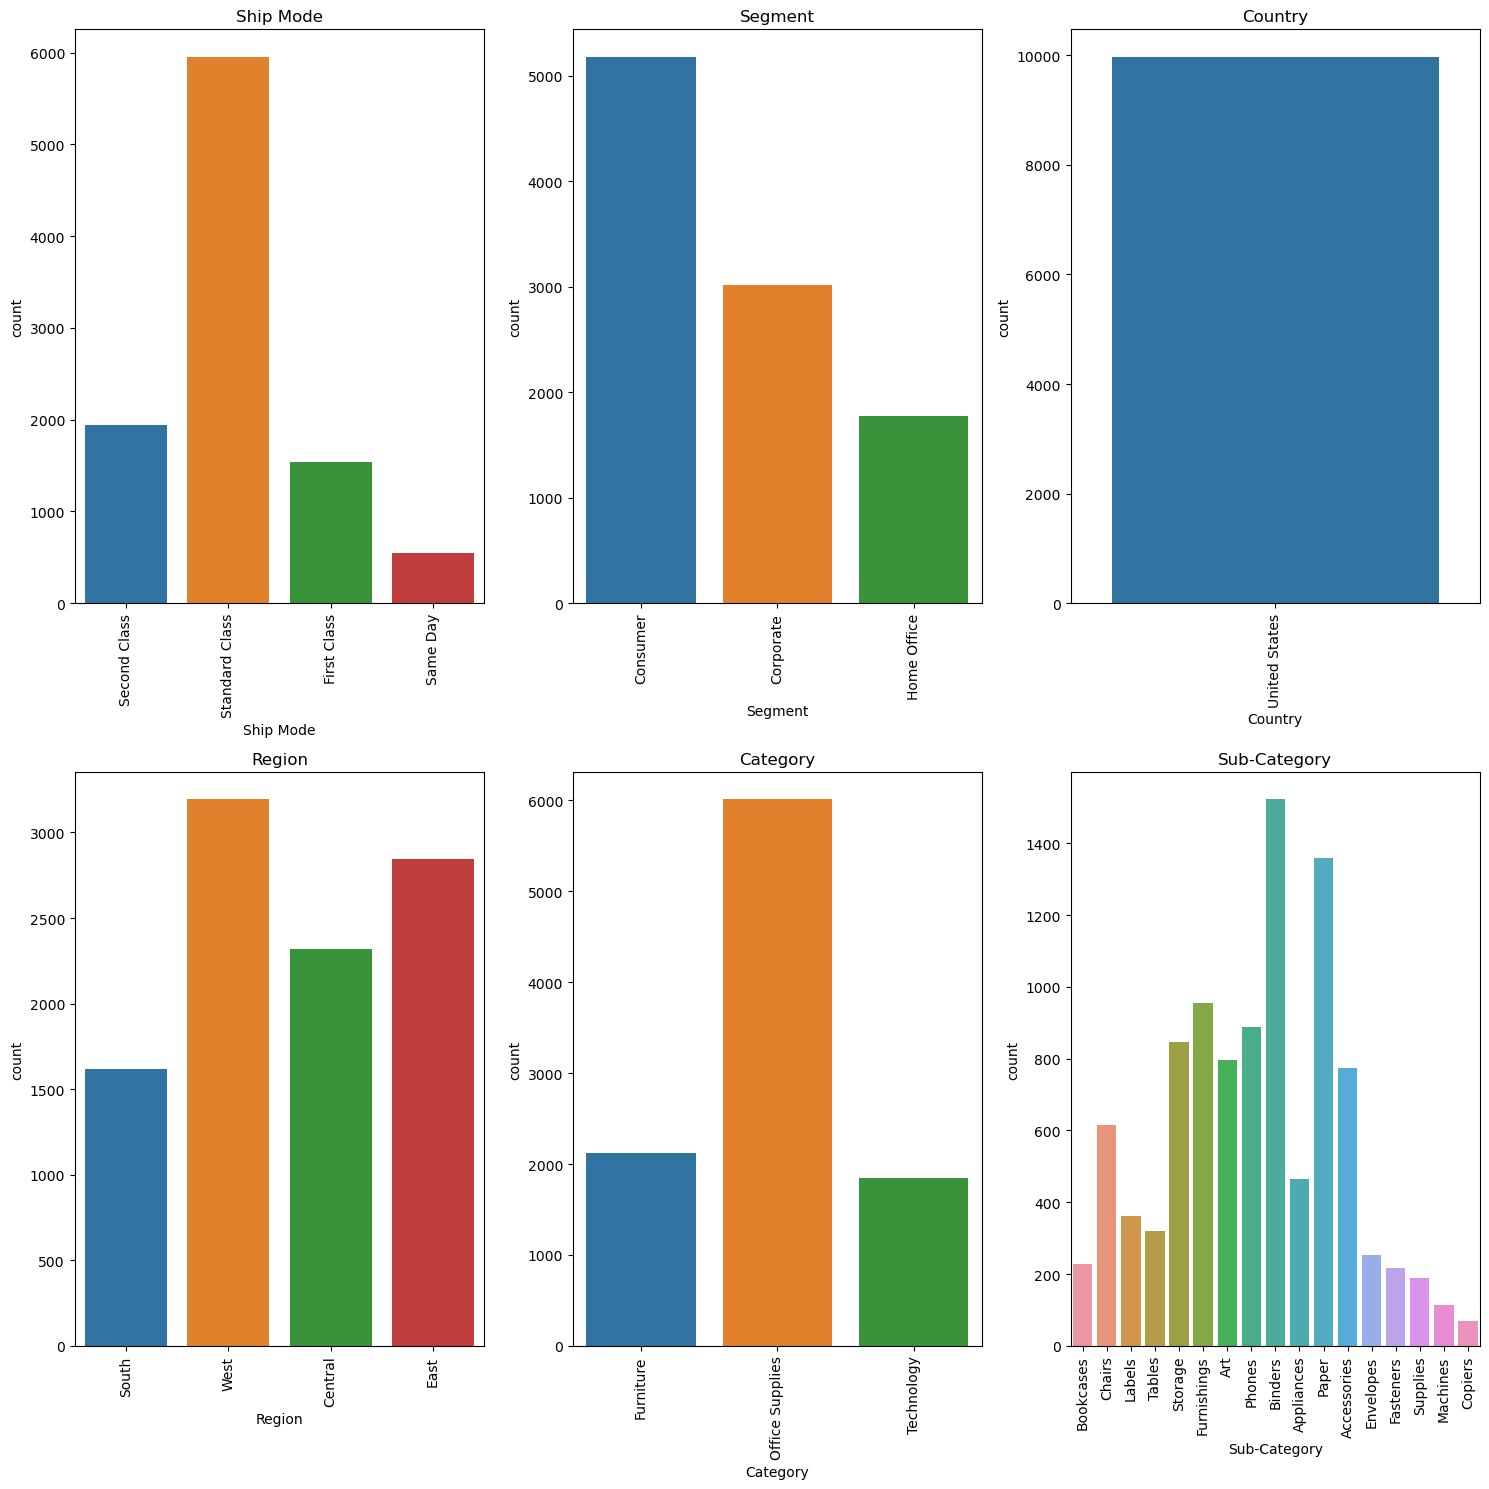

In [18]:
plt.figure(figsize=(15,15))

c=1
for i in df[['Ship Mode','Segment','Country','Region','Category','Sub-Category']]:
    plt.subplot(2,3,c)
    sns.countplot(df[i])
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

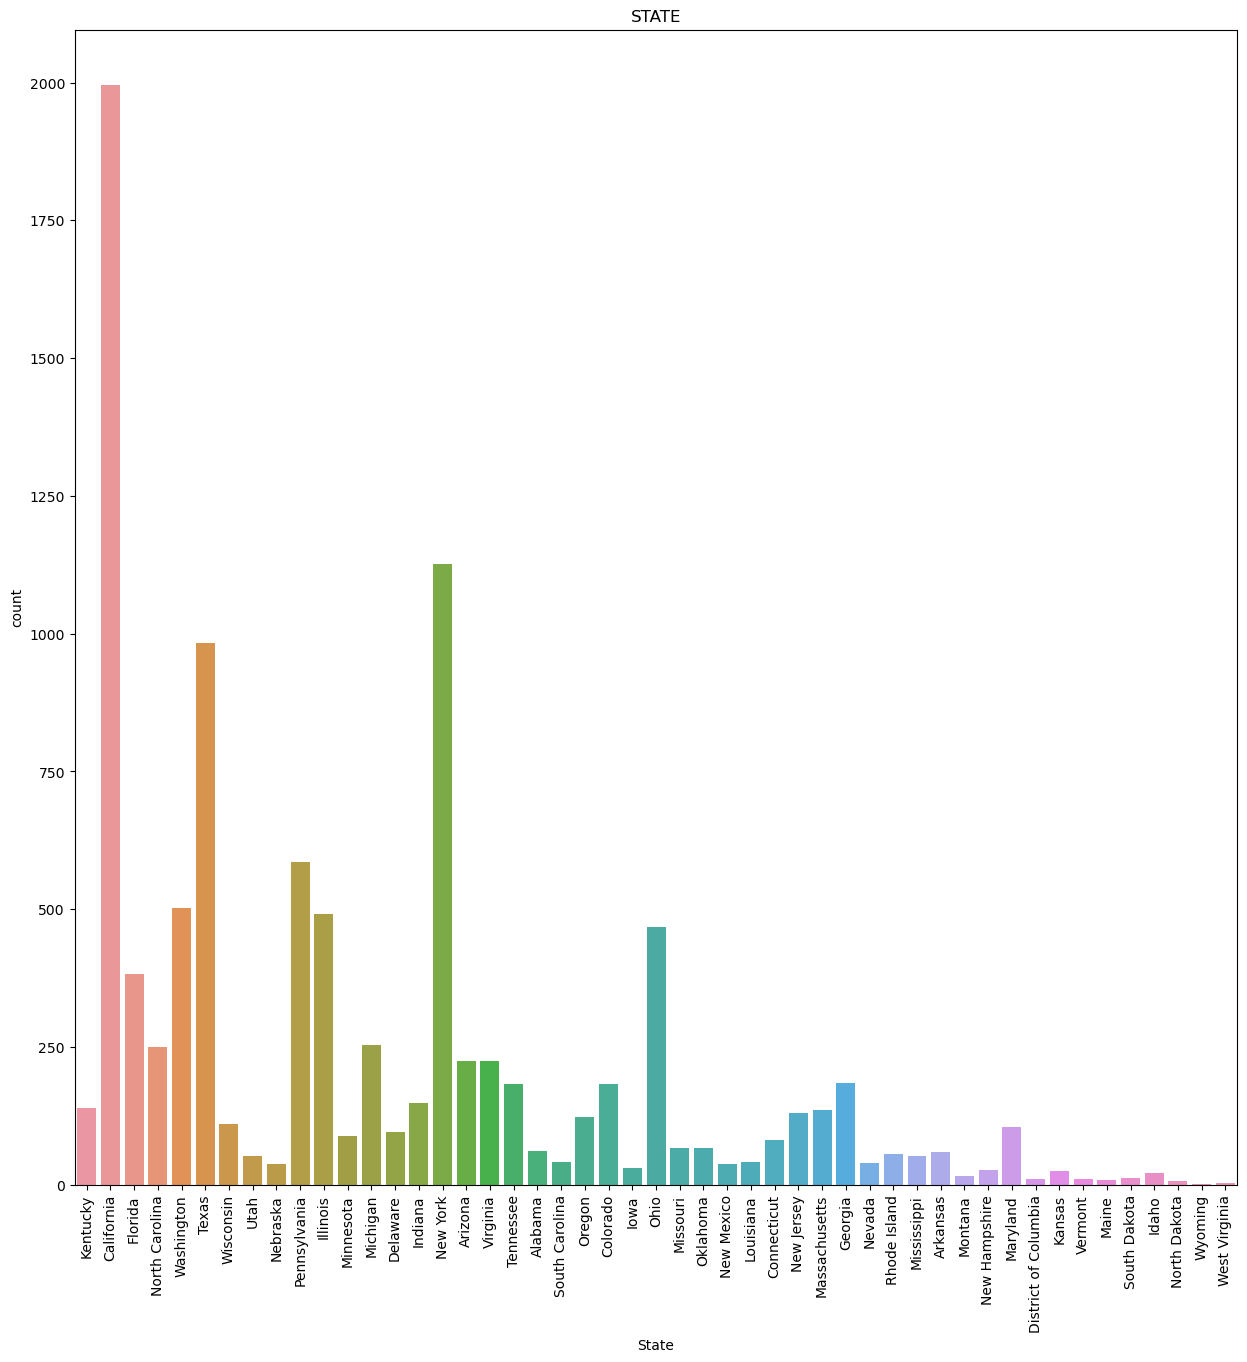

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

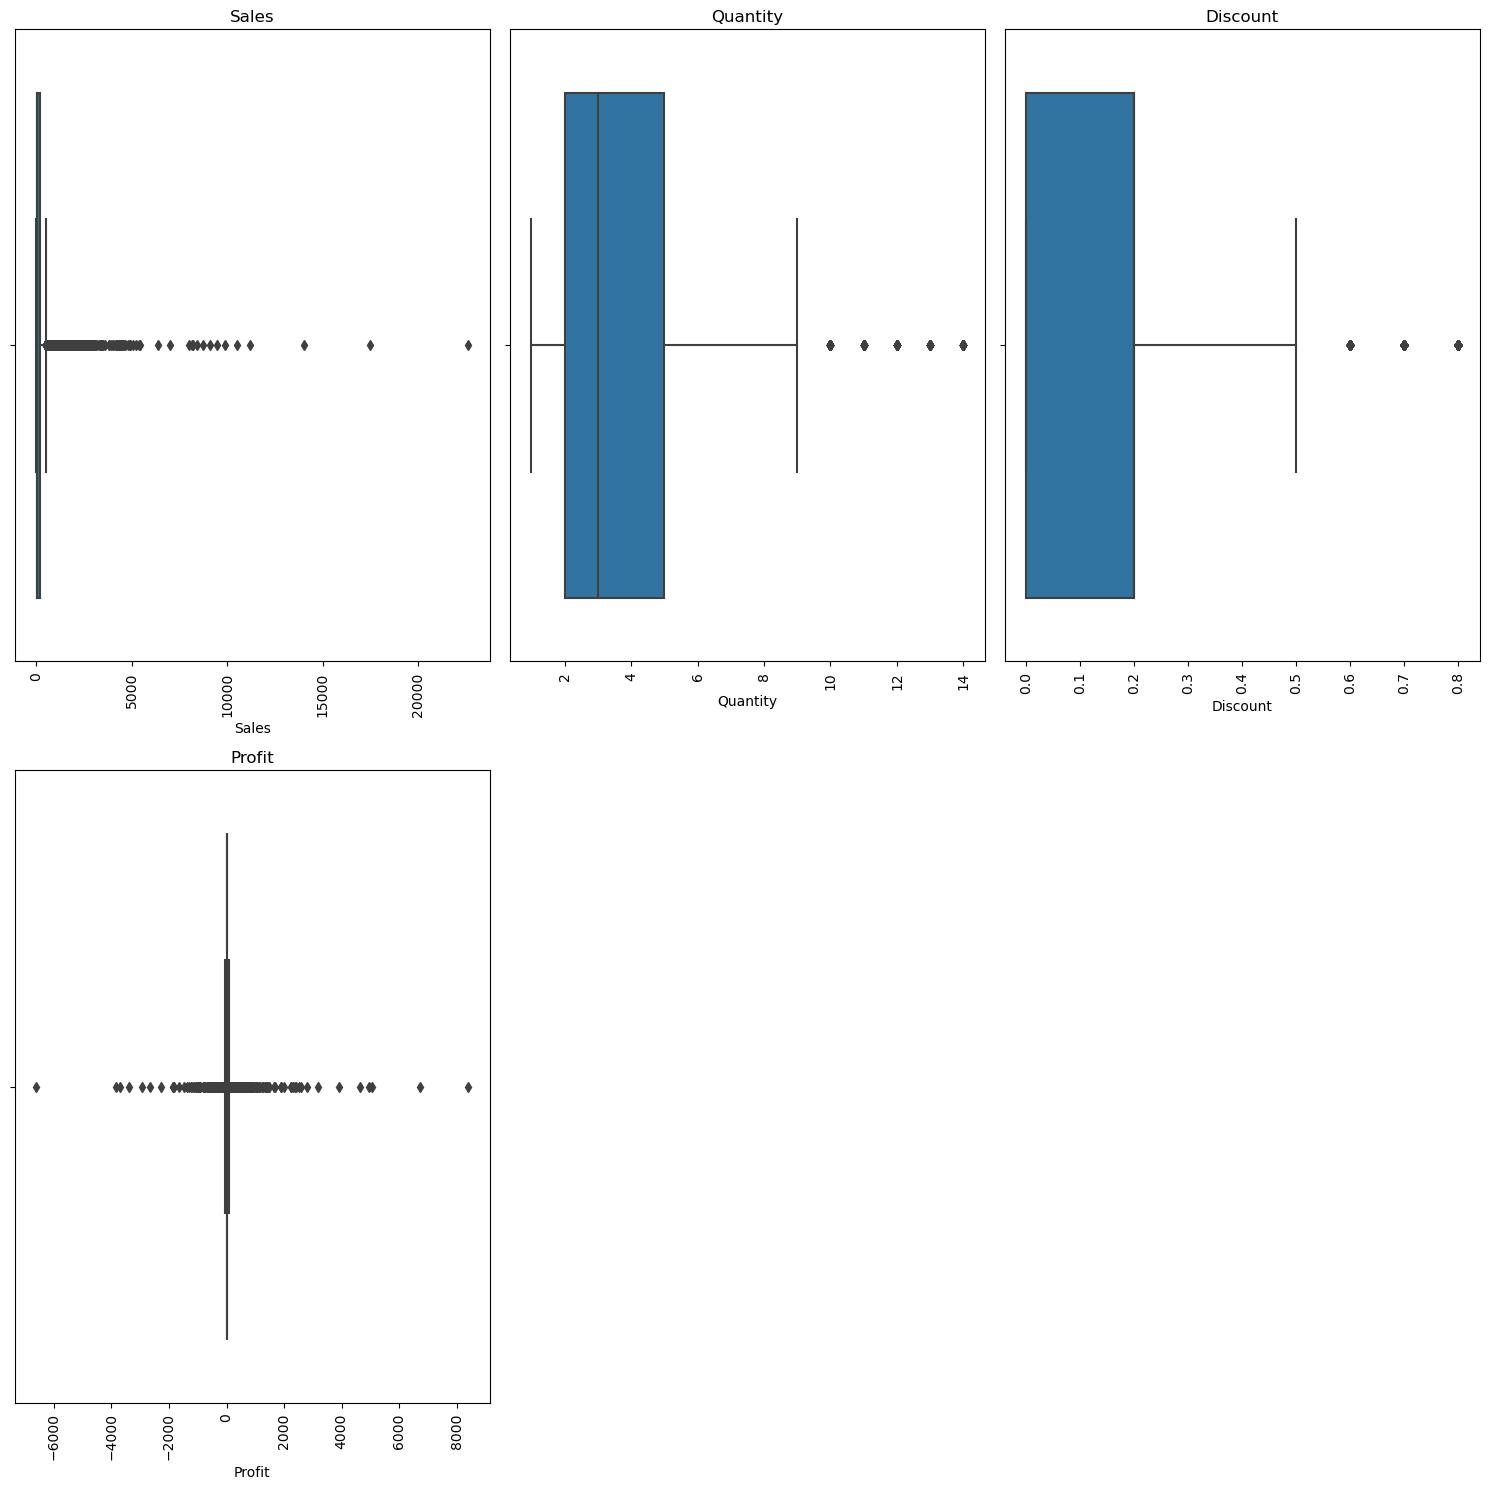

In [20]:
plt.figure(figsize=(15,15))

c=1
for i in df.select_dtypes(include=np.number):
    plt.subplot(2,3,c)
    sns.boxplot(df[i])
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

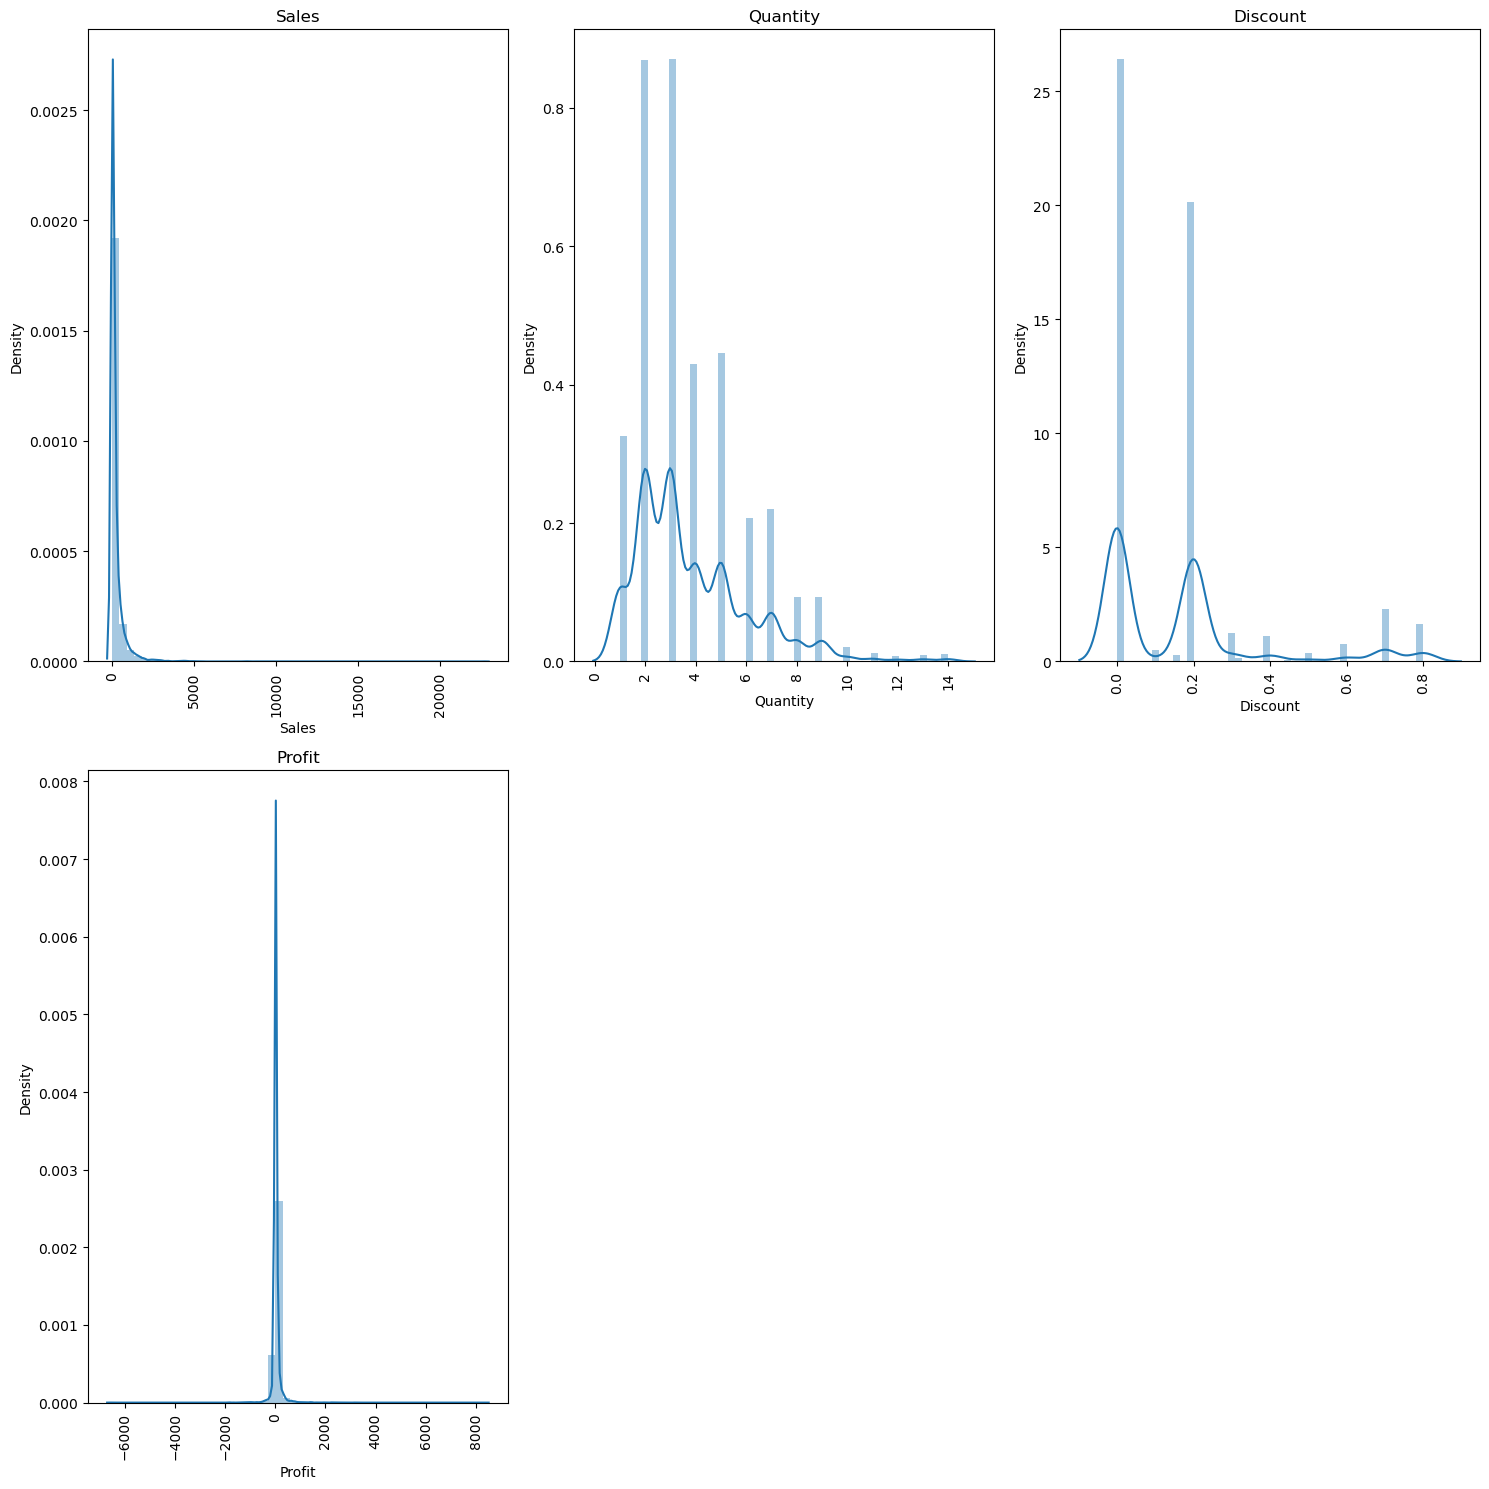

In [21]:
plt.figure(figsize=(15,15))

c=1
for i in df.select_dtypes(include=np.number):
    plt.subplot(2,3,c)
    sns.distplot(df[i])
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [22]:
df['Discount'].value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

### Check profit,sales and discount for each region

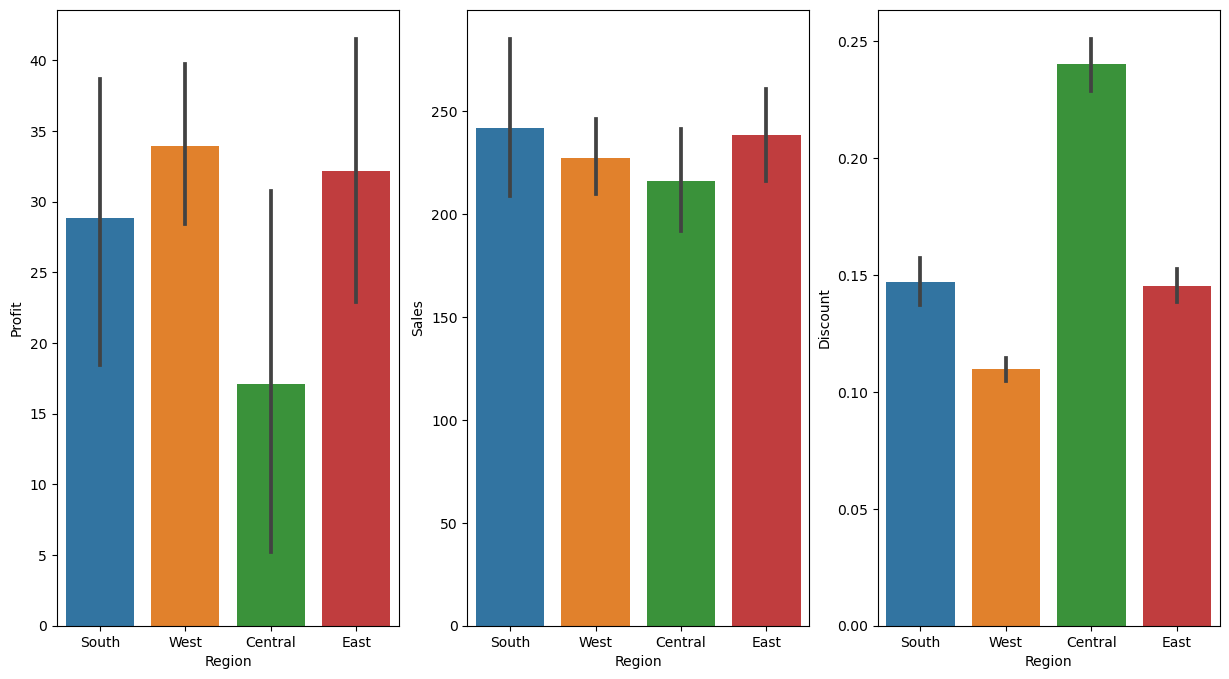

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(x='Region', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Region', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Region', y='Discount', data=df, ax=ax[2])
plt.show()

* West region has the highest profit and find same region has the lowest discount
* South has the highest sales
* Central has the lowest profit and has the highest discount maybe that's the reason

### Check profit,sales and discount for each Category

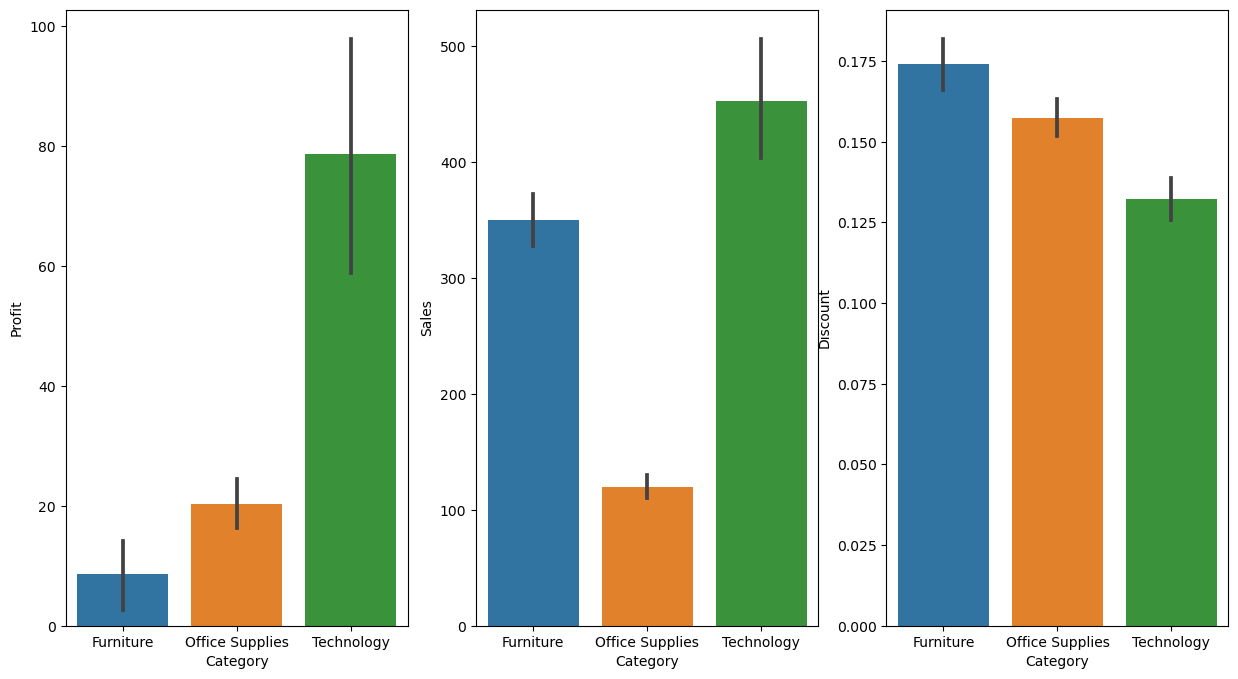

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2])
plt.show()

* Furniture sales is high but has very low profit maybe high discount is the reason

## For each Segment

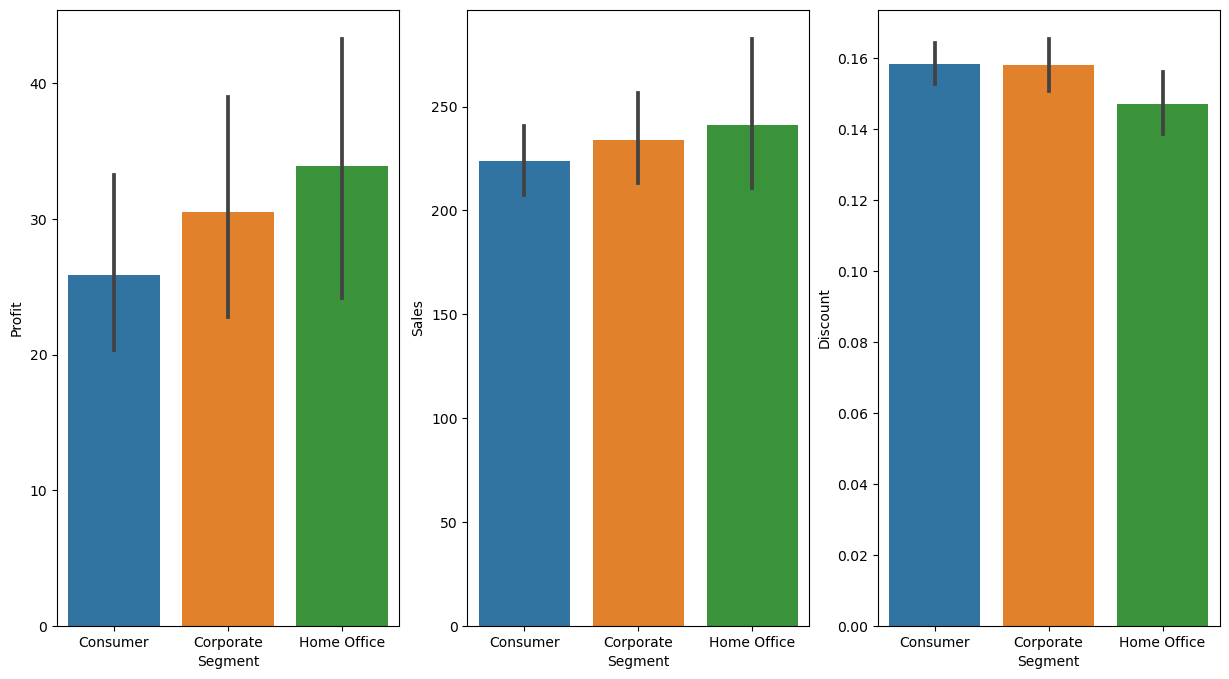

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2])
plt.show()

* Home Office has the lowest dicount but has also the highest profit as sales

## For each shipe mode

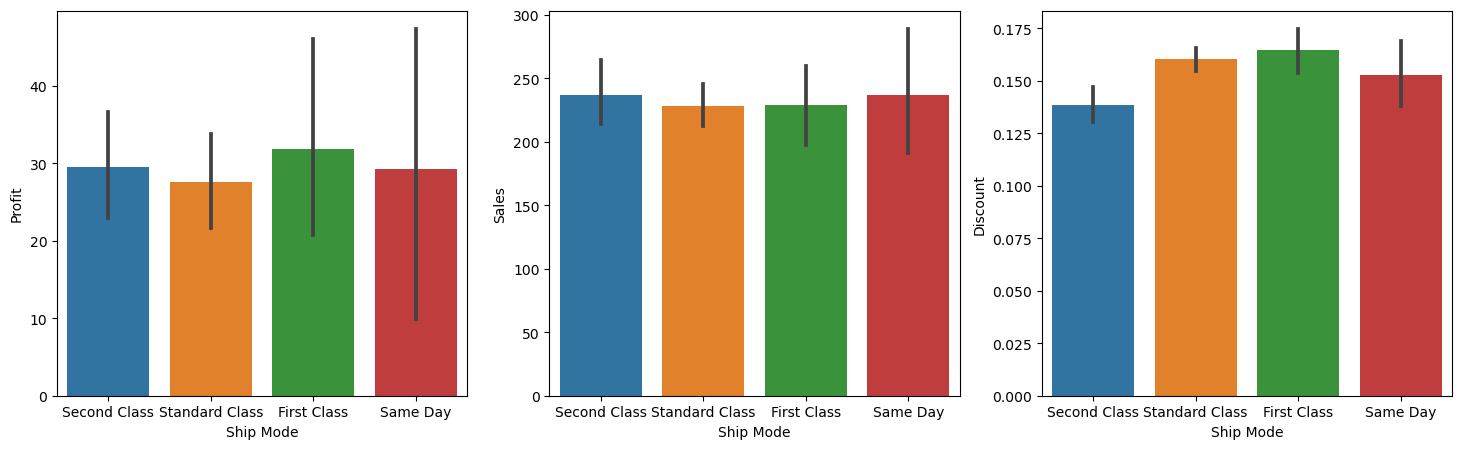

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Ship Mode', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Ship Mode', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data=df, ax=ax[2])
plt.show()

* First class has highest discount but also highest profit

## For quantity

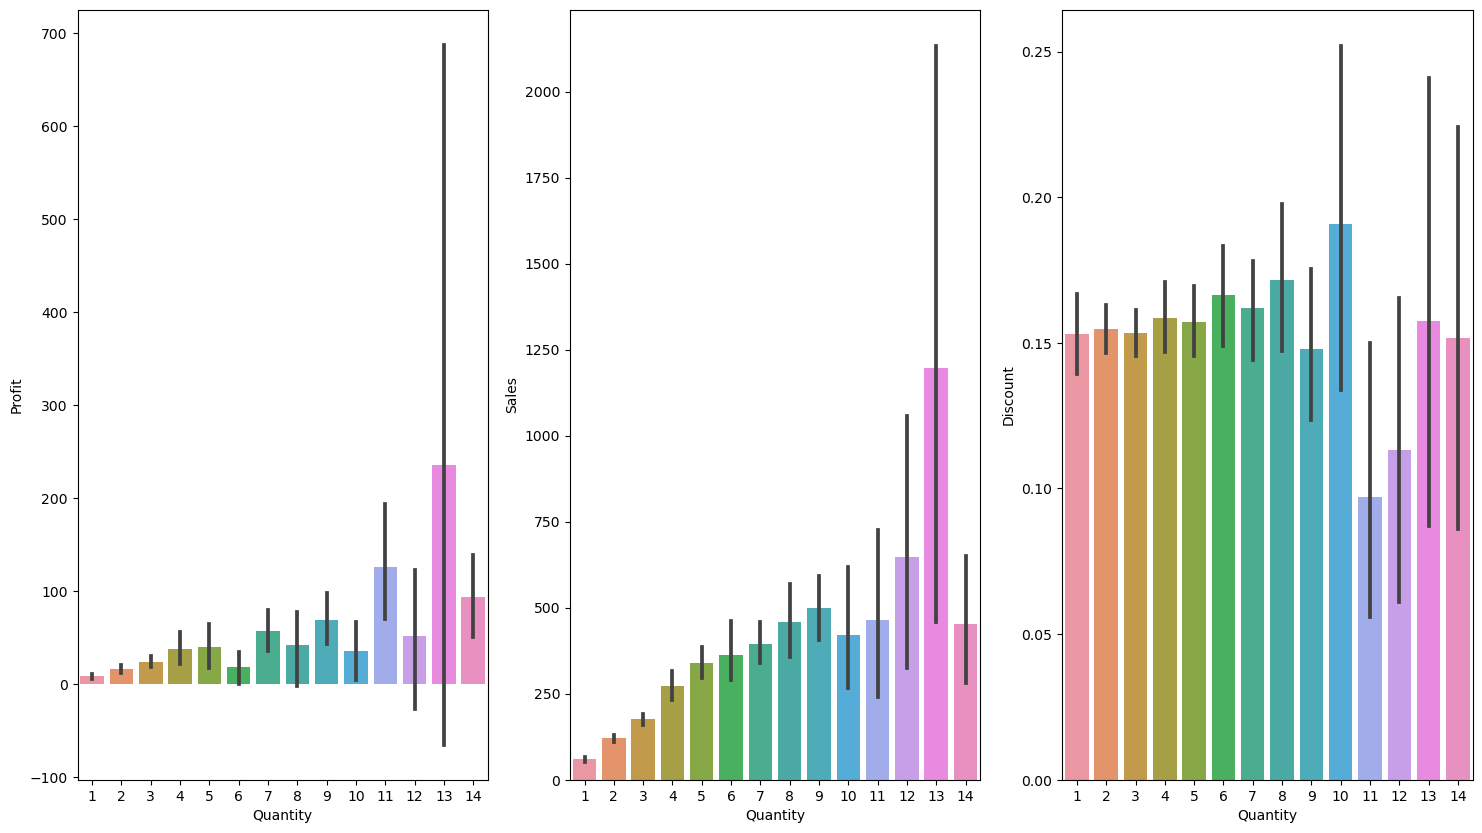

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2])
plt.show()

* Quantity 13 is the highest in sales and profit but number 10 is the highest in discount and gain lower profit

## Check Category and Sub-Category

check number of each category

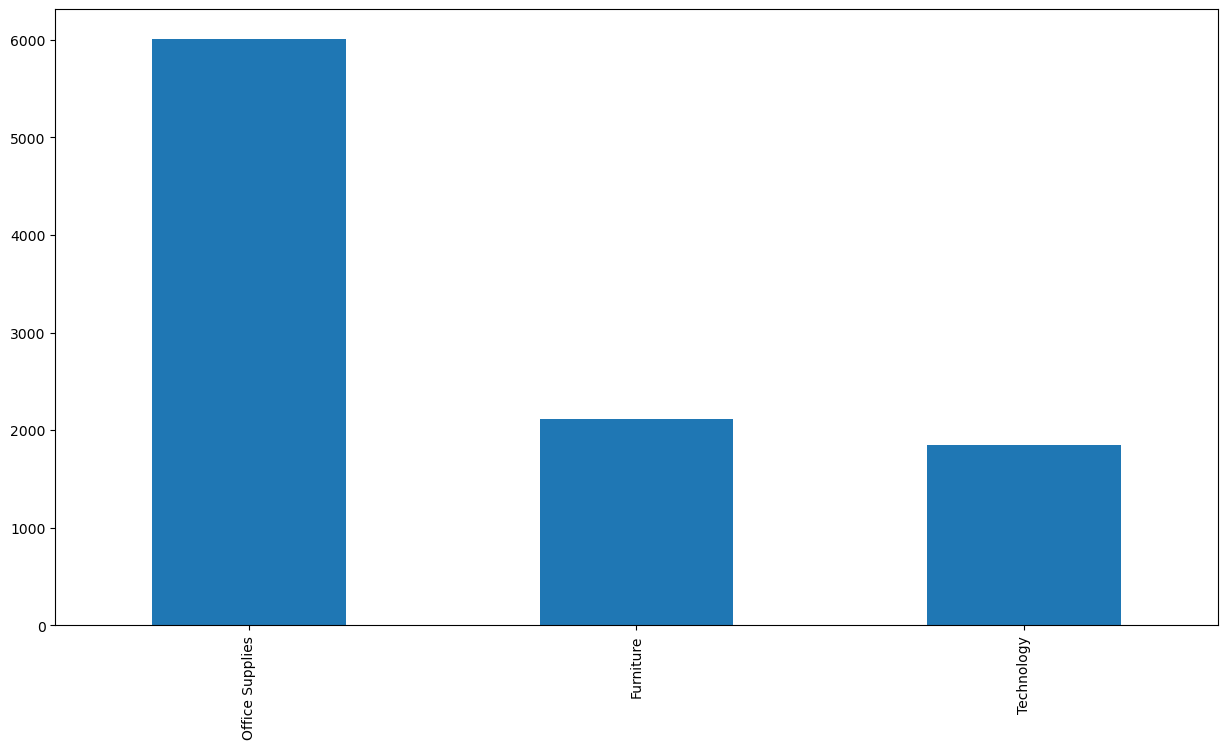

In [28]:
df['Category'].value_counts().plot(kind='bar')
plt.show()

* Office Supplies has the highest Numberm

## Check Number of Each Sub-Category

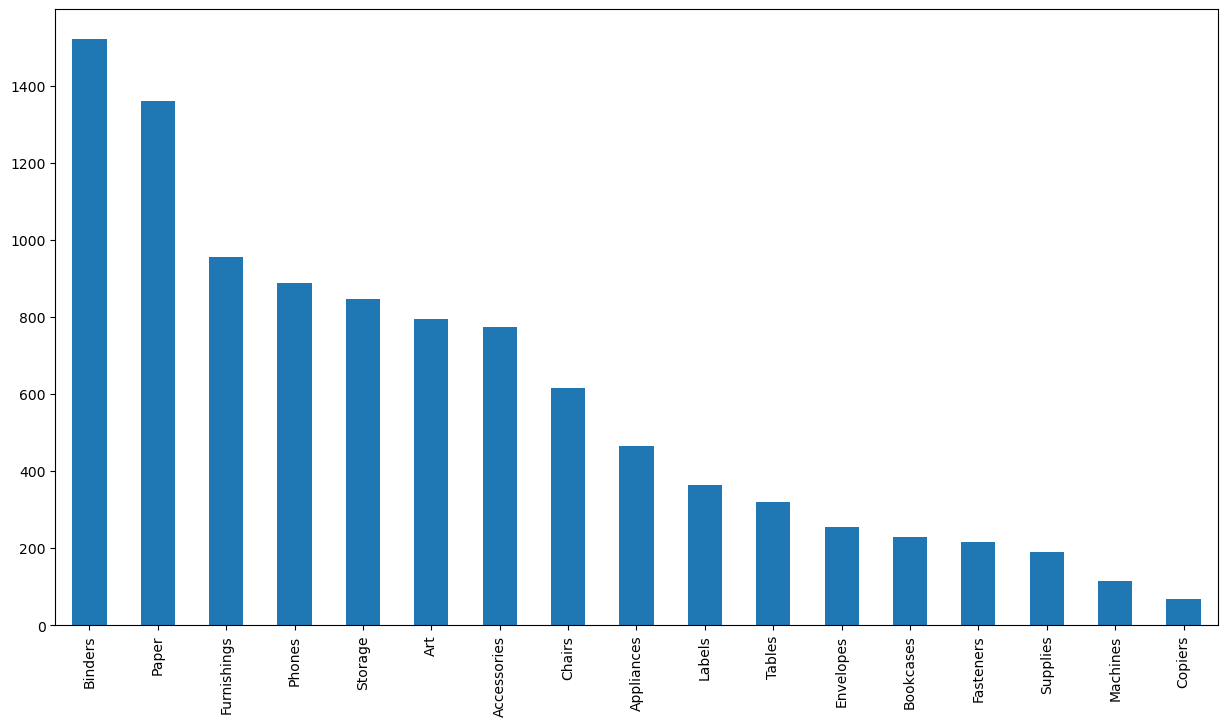

In [29]:
df['Sub-Category'].value_counts().plot(kind='bar')
plt.show()

* Sales of Binders as Paper are the highest

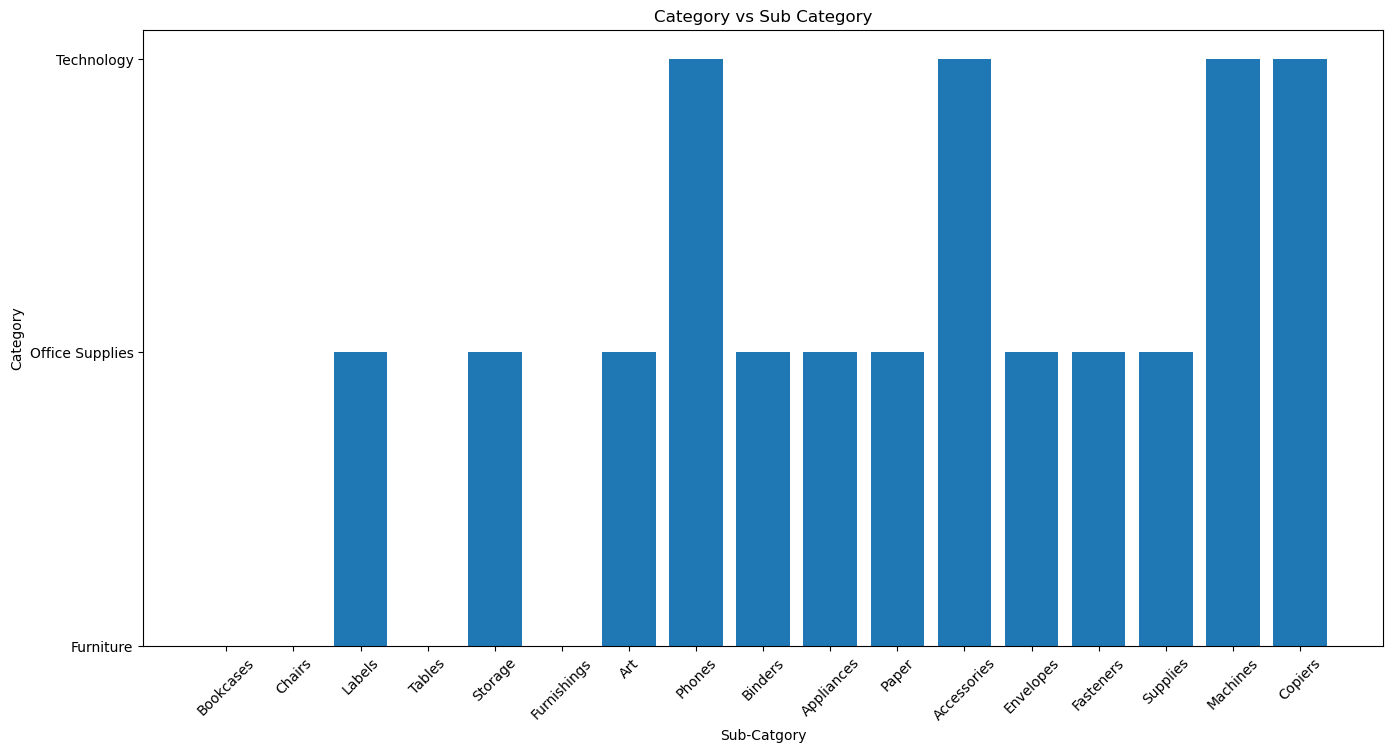

In [30]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

### Check category with discount and profit

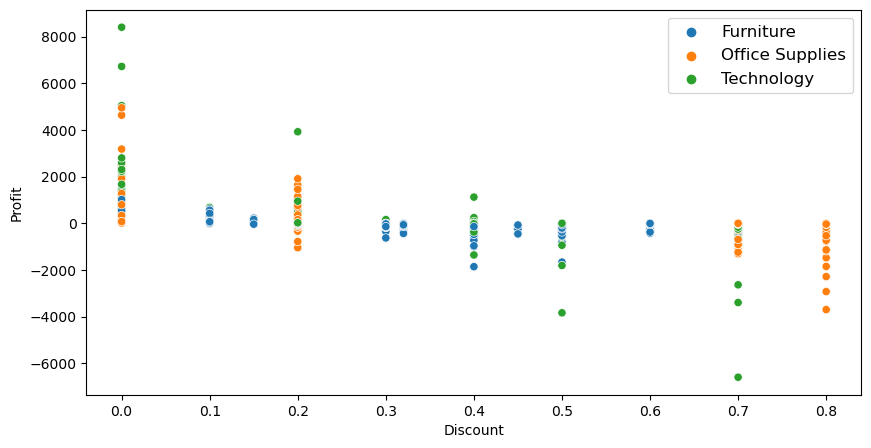

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df)
ax.legend(fontsize=12)
plt.show()

* Office Supplies has maximum loss at 80% discount
* Furniture and Technology have maximum loss between 30% to 50%
* Technology also has maximum loss profit at 70%

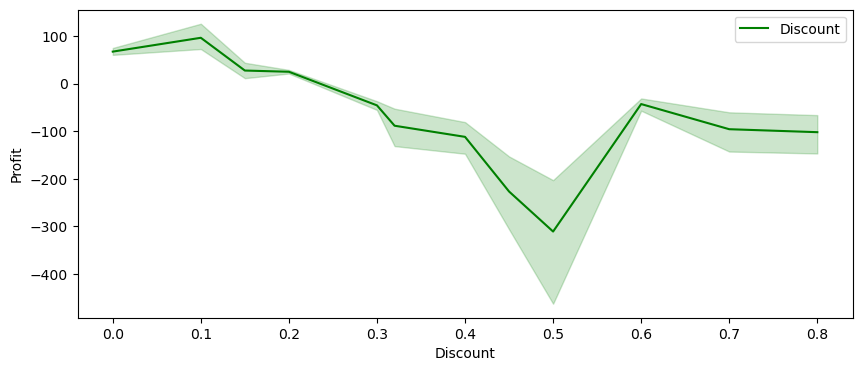

In [32]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=df , color='g',label='Discount')
plt.legend()
plt.show()

## Check Sub-category with profit

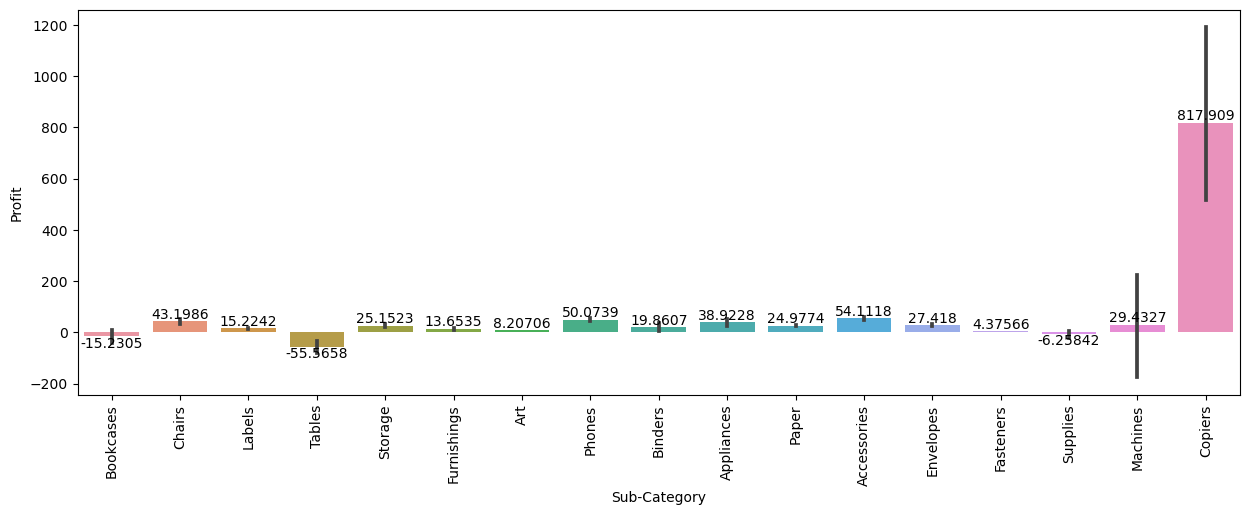

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Sub-Category', y='Profit', data=df);
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

## State Wise Profit

In [34]:
# group by with each state
states = df.groupby('State').sum().sort_values('Sales', ascending=False)
states.reset_index(inplace=True)

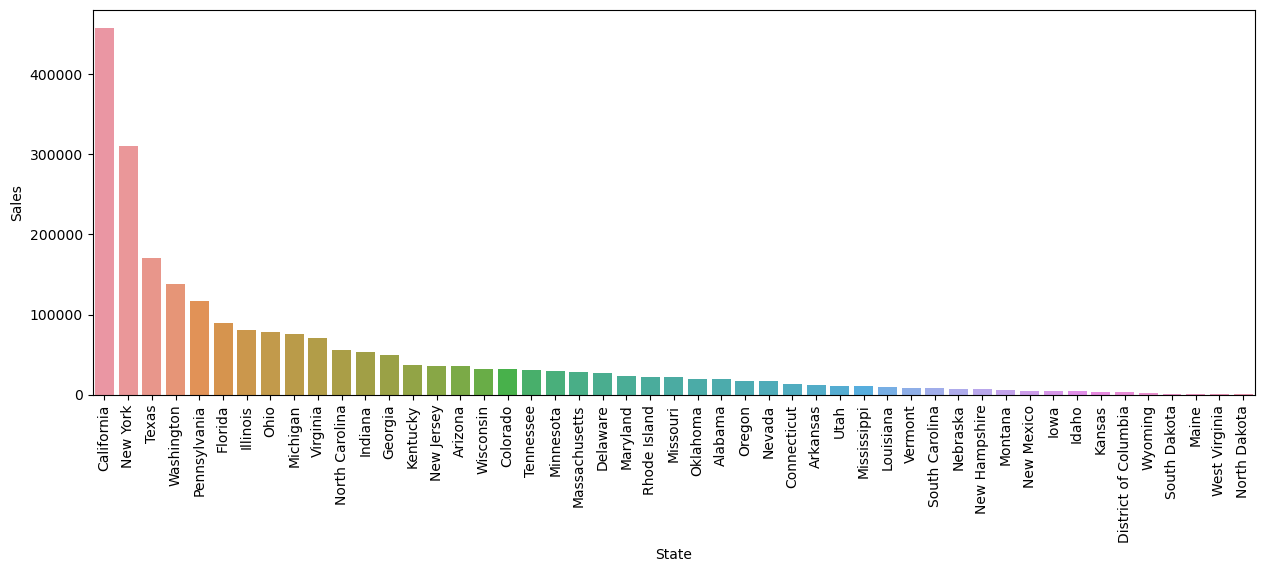

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Sales', data=states);
plt.xticks(rotation=90)
plt.show()


* California and New York have the maximum sales

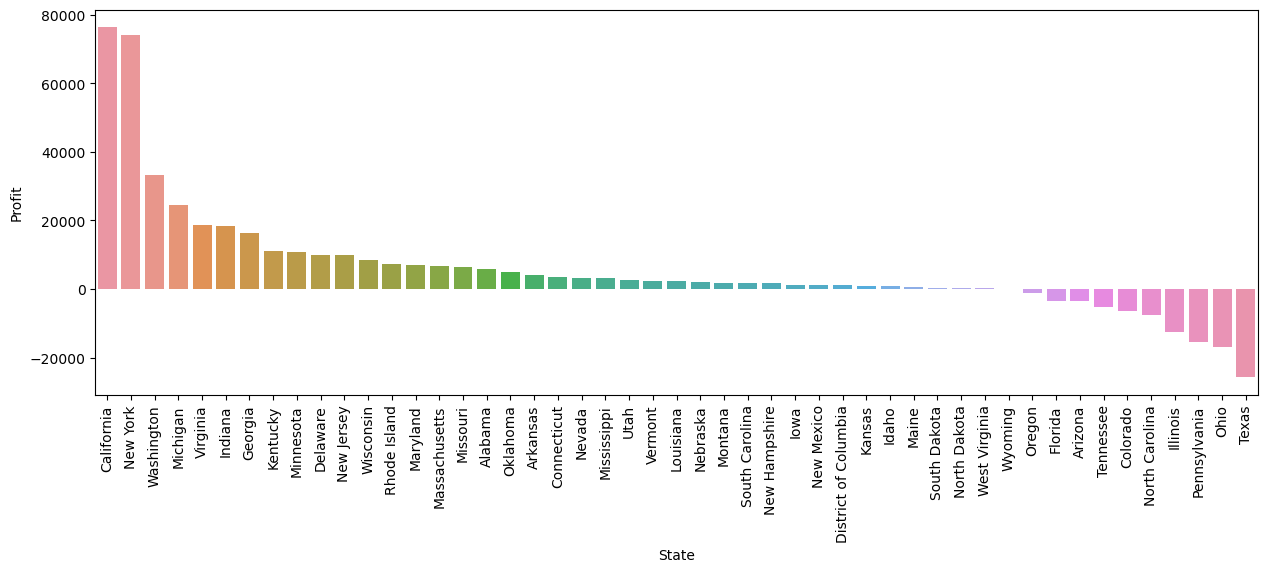

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
states = states.sort_values('Profit', ascending=False)
sns.barplot(x='State', y='Profit', data=states);
plt.xticks(rotation=90)
plt.show()

* California and New York have the highest profit

* There are states have a good sales but profit in negative

### Sales and profit for each stateSales and profit for each state

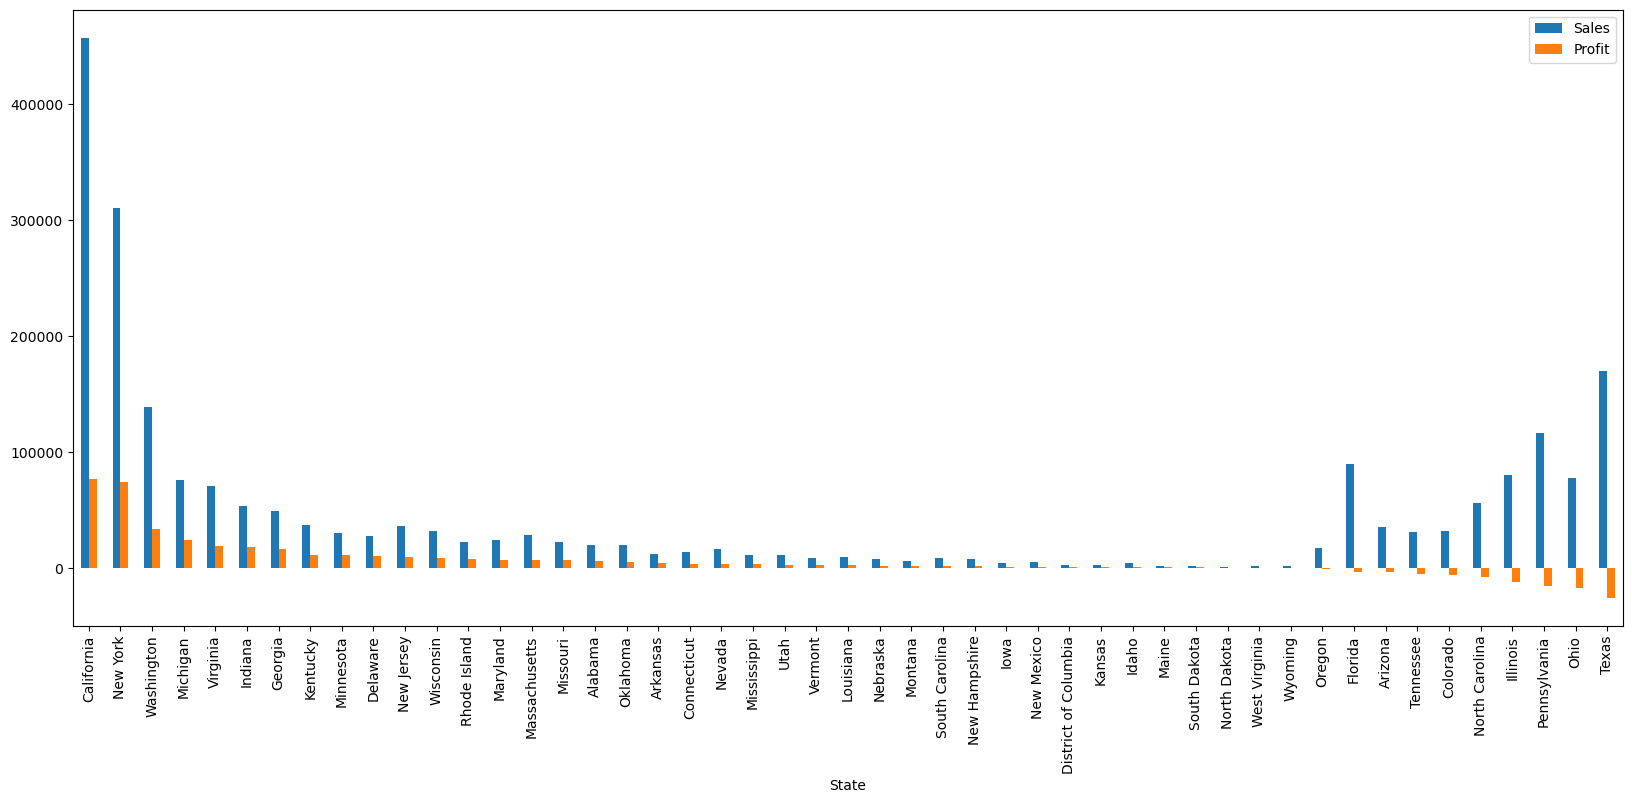

In [37]:
states= df.groupby(['State'])[['Sales', 'Profit']].sum()
states.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.show()


* Califonia and Newyork has highesst number of Sales but have less profit


## Discount For State

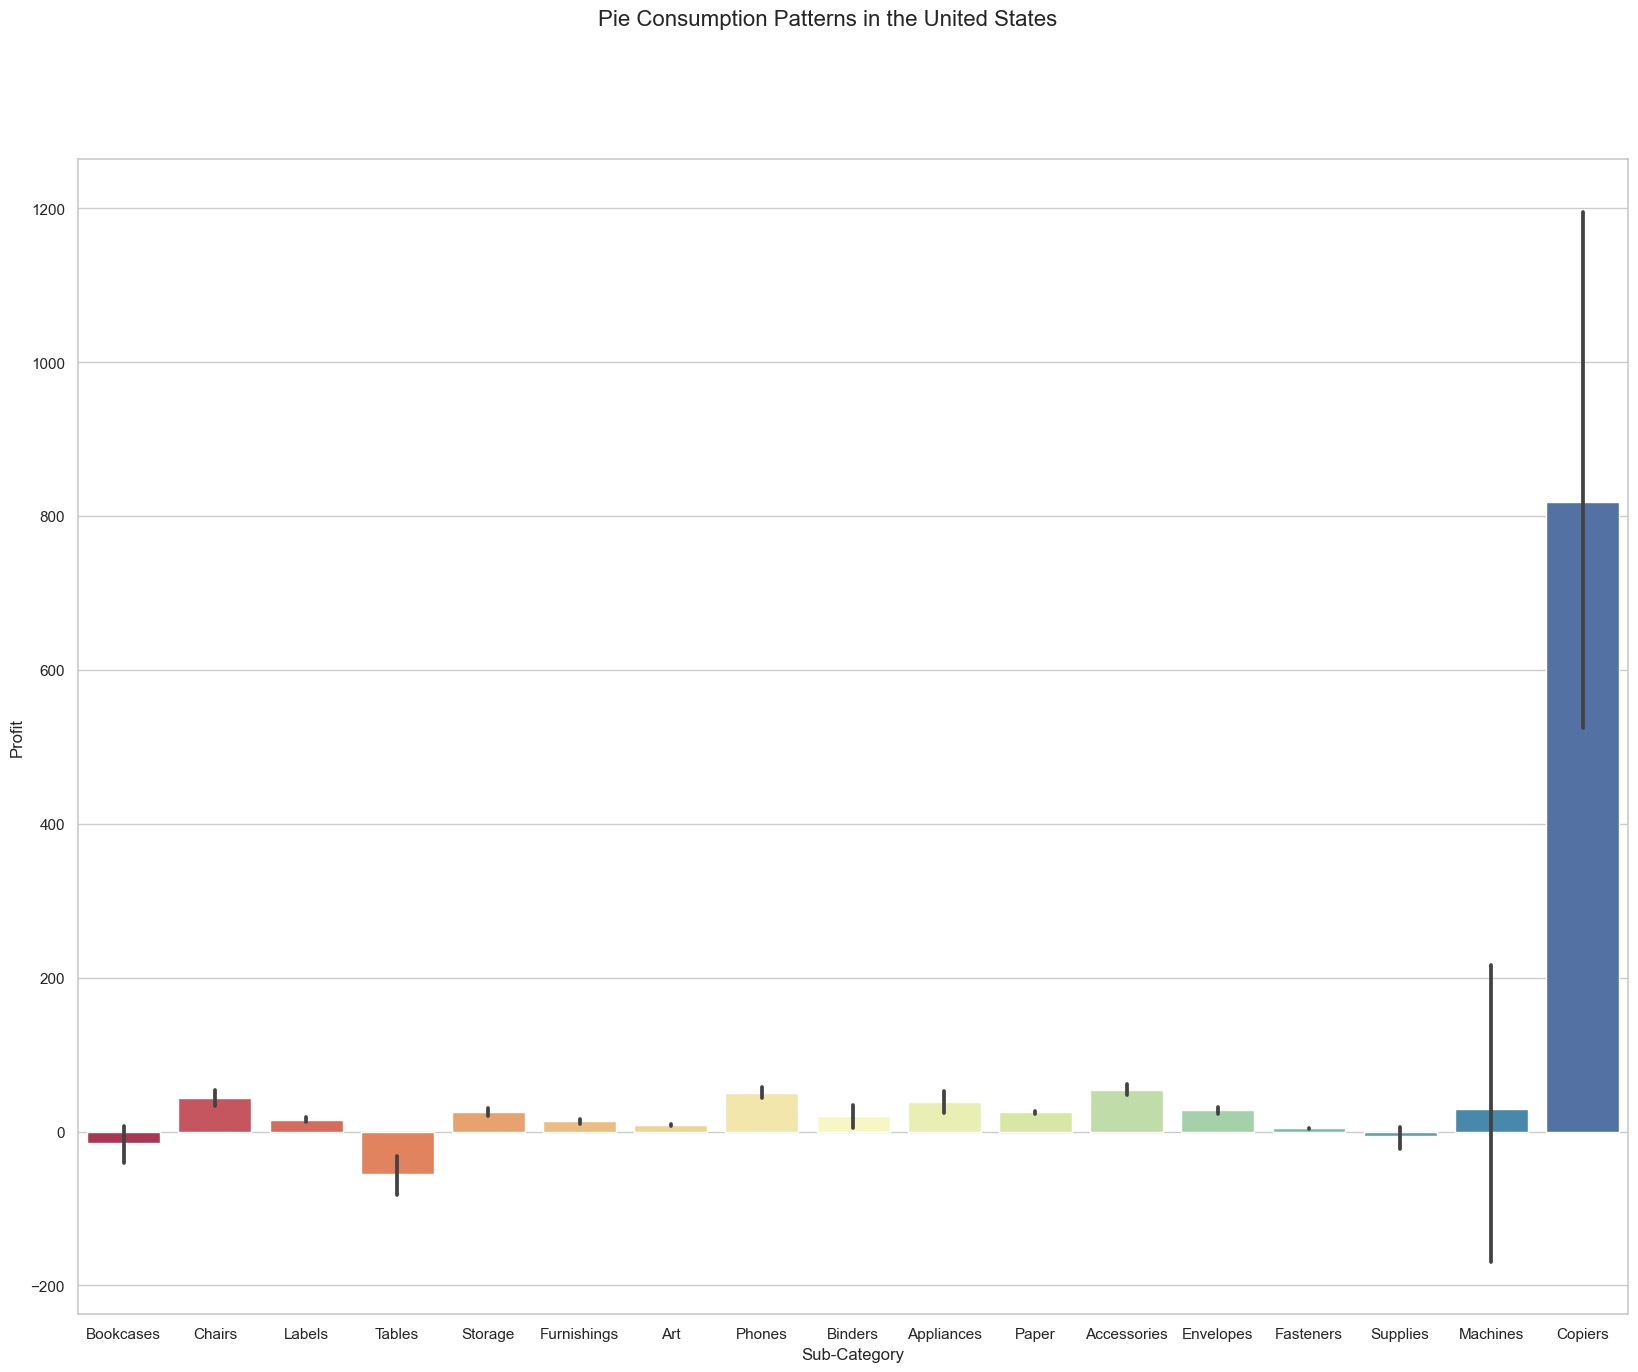

In [38]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit', data=df, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

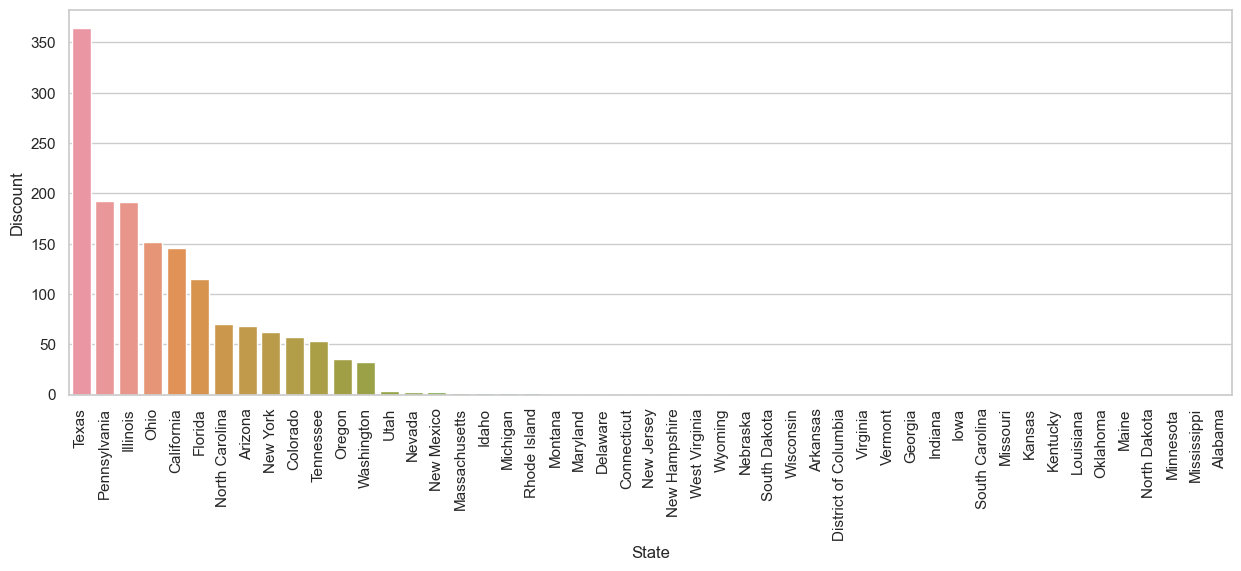

In [39]:
states= df.groupby(['State']).sum().sort_values('Discount', ascending=False)
states.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Discount', data=states)
plt.xticks(rotation=90)
plt.show();

* Texas has Highest Discount nut profit is in Negative.
* High discount sometimes Cause to Loss profit by seen above we can see that.

### We have a few questions to answer here.

#### 1 What products do the most profit making states buy?

#### 2 What products do the loss bearing states buy?

#### 3 What product segment needs to be improved in order to drive the profits higher?

In [40]:
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

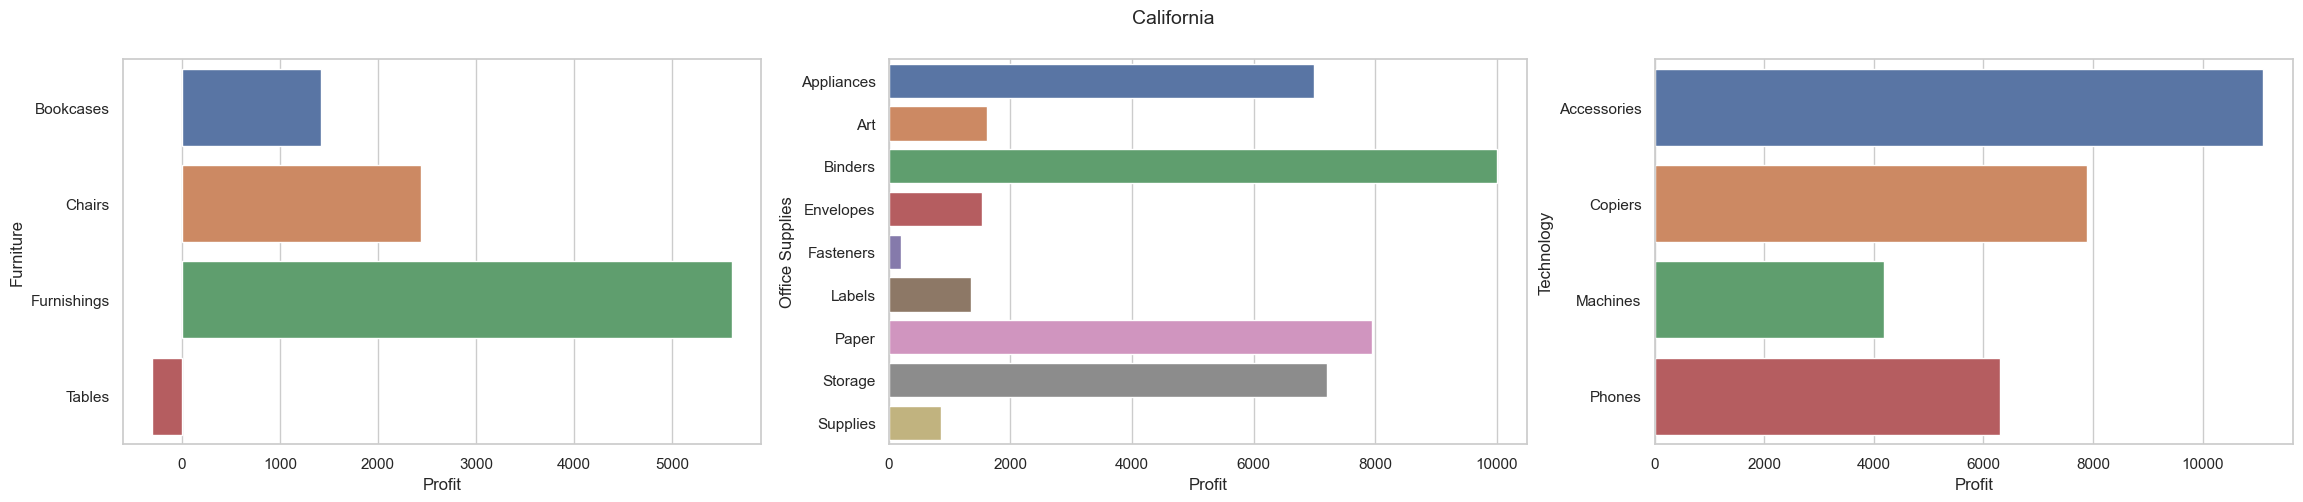

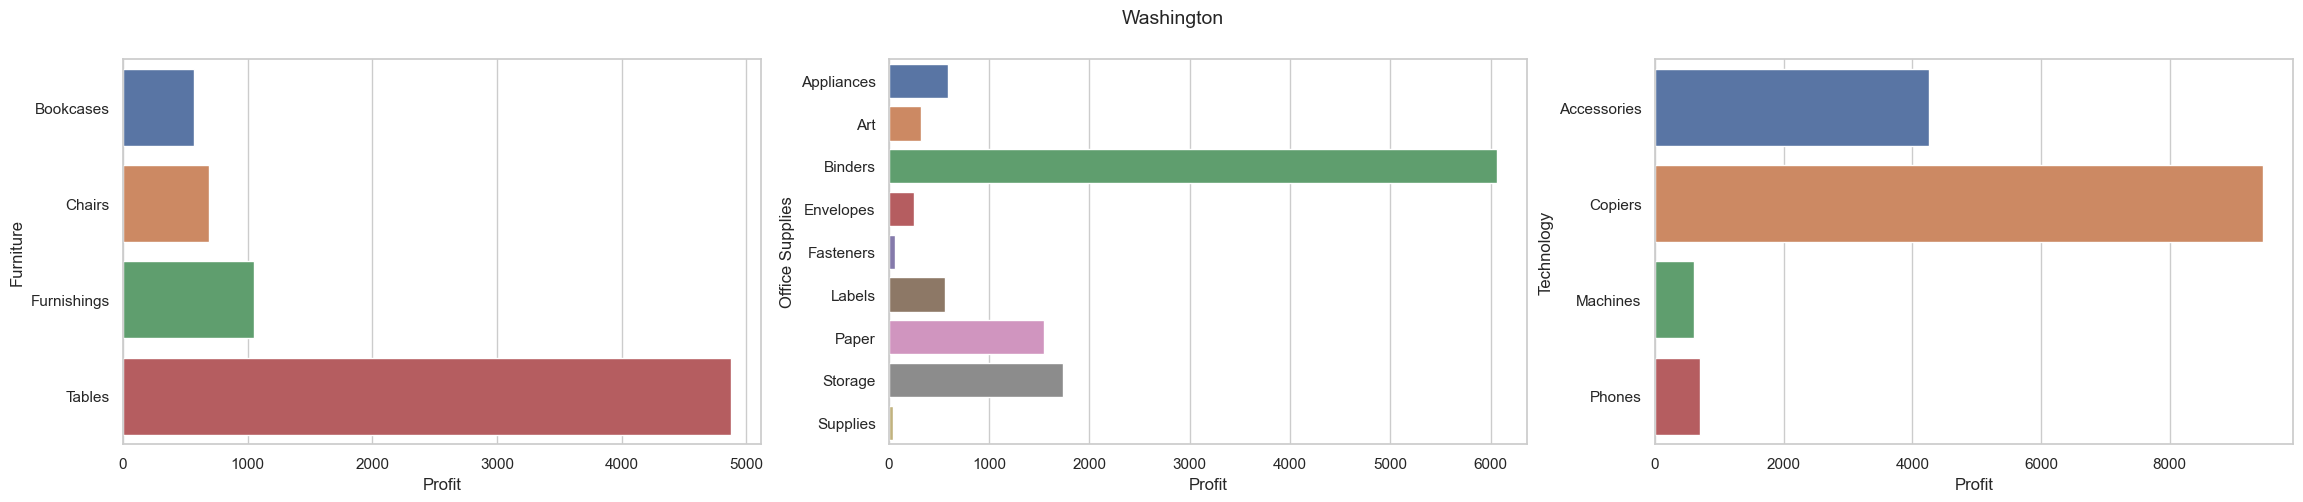

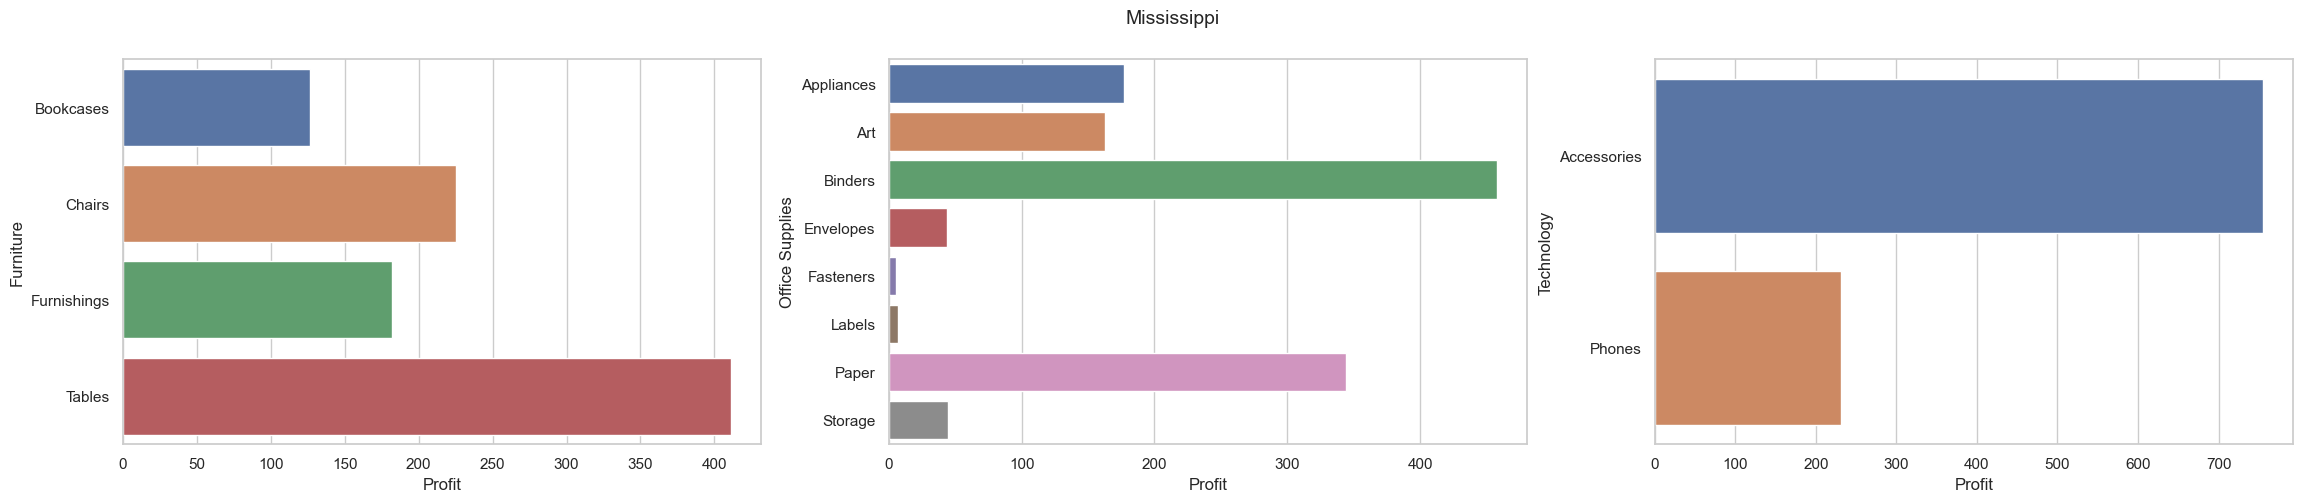

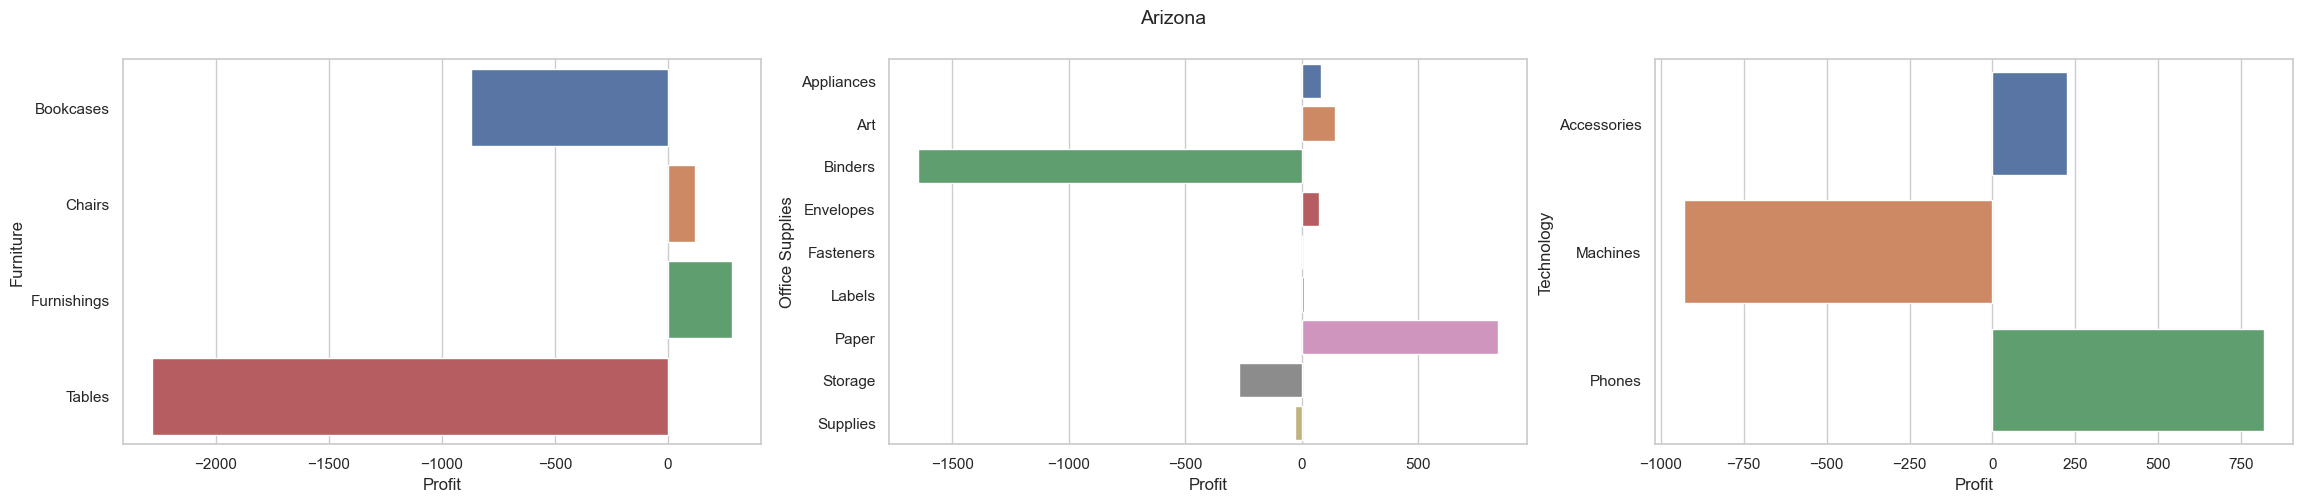

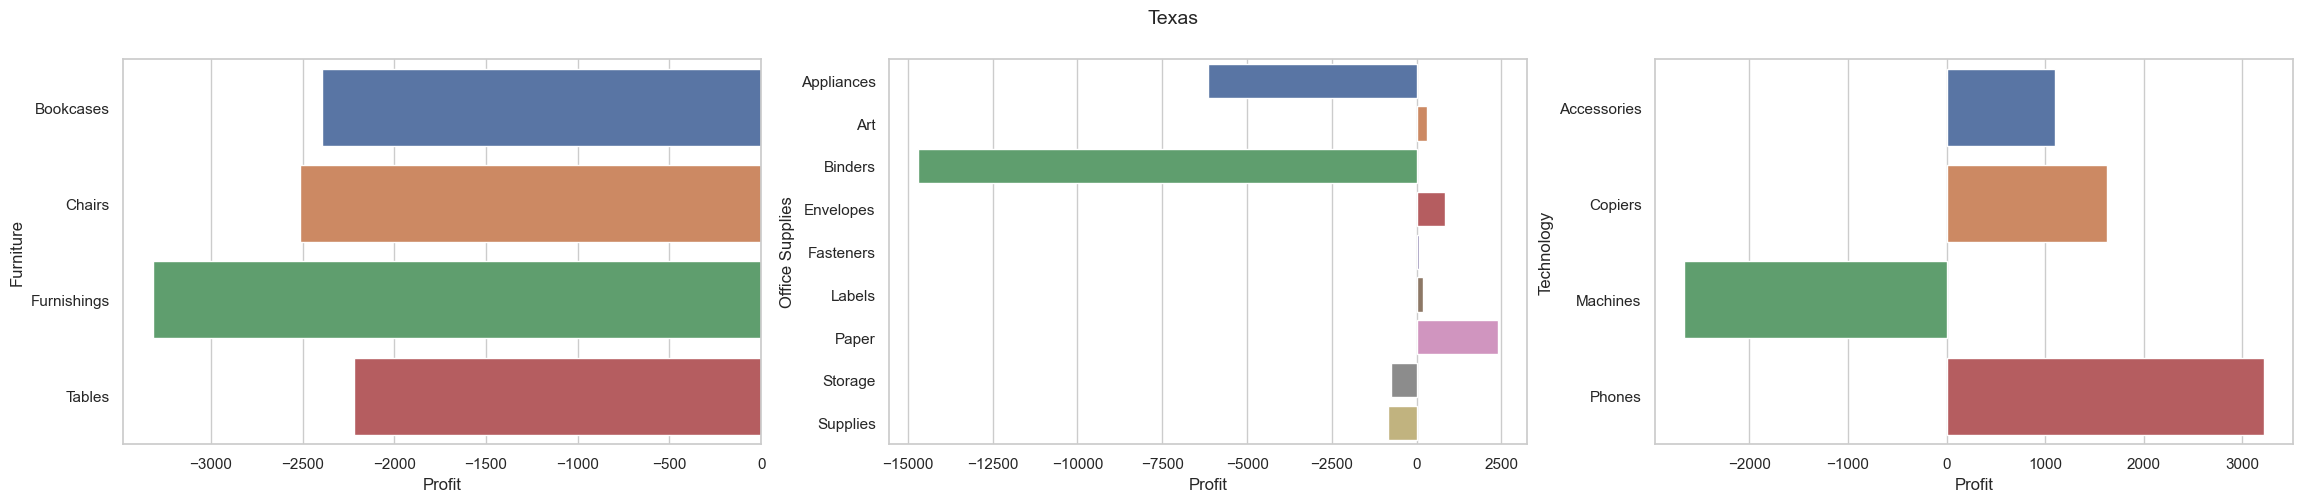

In [41]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)


## Conclusions

### Weak areas where Manager can work to make more profit.¶
* Sales and Profit are not in linear for most States
* Central region need more attention
* Furniture and Office Supplies have high loss profit with high discount
* Office Supplies has maximum loss at 80% and 0% discount
* Furniture and Technology have maximum loss between 30% to 50%
* Technology also has maximum loss profit at 70%
* Tables and Supplies and Bookases in sub_category have negative profit

### What all business problems you can derive by exploring the data
* Technology earns more profit compared to furniture
* Same day shipping earns high sales
* West region has the highest profit
* Vermont state has a good profit with low sales
* Discount with 50% and less gain more profit
* Need to give more discount in Ferniture to attract customers
* In segment need to give more discount in Consumer and in Home-Office promot more for higher the profit

# E N D